## **MOVIE GENRE DATA ANALYSIS**

## **Introduction**

#### My focus is on Genre's.
#### Here are some thins I want to look at:

### **Research Questions (Q):**
#### 1. Which genre's are most common (number of movies made)?
#### 2. Which genre's have high avg. budget and revenue?
#### 3. Which genre's have high avg. popularity?
#### 4. Which genre's have highest number of movies with a voting avg. of >= 8?

### **Research Hypotheses(H):**
#### 1. The best movies according to vote avg. return high profit and revenue.
#### 2. The best movies according to popularity return high profit and revenue.
#### 3. Highly budgeted movies return hight revenue and profit.
#### 4. Highly budgeted movies have a high popularity.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Loading the movie dataset from the CSV file into a DataFrame for analysis
movies = pd.read_csv('D:\OneDrive\Desktop\Job HUNT 21-10-2025\AanalystBuilder Resources\Resources\Working with Files\imdb_movies.csv')

In [68]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [97]:
# Displaying the first few rows of the dataset to get a quick overview of its structure and contents
movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [98]:
# Identifying any completely duplicate rows in the dataset to check for repeated records
movies[movies.duplicated()]

id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  \
2090  Dwight H. Little  Survival is no game   

                                               keywords  \
2090  martial arts|dystopia|based on video game|mart...   

                                               overview  runtime  \
2090  In the year of 2039, after World Wars destroy ...       92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10         110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0

In [99]:
# Removing any duplicate rows from the dataset to ensure each record is unique
movies.drop_duplicates(inplace = True)

In [72]:
# Checking if duplicates were dropped
movies[movies.duplicated()]

Empty DataFrame
Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

In [100]:
# Removing rows where the 'genres' column is missing, so that only movies with genre information remain
movies.dropna(subset = ['genres'], inplace = True)

### **Research Questions (Q):**
#### 1. Which genre's are most common (number of movies made)?
#### 2. Which genre's have high avg. budget and revenue?
#### 2.5 Which genre's have high avg. profit?
#### 3. Which genre's have high avg. popularity?
#### 4. Which genre's have highest number of movies with a voting avg. of >= 8?

In [74]:
movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [101]:
# Creating a new column to show the profit made by each movie (revenue minus budget)
movies['profit'] = movies['revenue'] - movies['budget']

In [76]:
movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj      profit  
0           6.5          2015  1.379999e+08  1.392446e+09  1363528810  
1           7.1          2015  1.379999e+08  3.481613e+08   228436354  
2           6.3          2015  1.012000e+08  2.716190e+08   185238201  
3           7.5          2015  1.839999e+08  1.902723e+09  1868178225  
4           7.3          2015  1.747999e+08  1.385749e+09  1316249360

In [257]:
# Creating a new DataFrame with only the selected columns needed for genre-based analysis
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]

In [258]:
movies_genre.head()

popularity     budget     revenue                original_title  runtime  \
0   32.985763  150000000  1513528810                Jurassic World      124   
1   28.419936  150000000   378436354            Mad Max: Fury Road      120   
2   13.112507  110000000   295238201                     Insurgent      119   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens      136   
4    9.335014  190000000  1506249360                     Furious 7      137   

                                      genres  release_year  vote_count  \
0  Action|Adventure|Science Fiction|Thriller          2015        5562   
1  Action|Adventure|Science Fiction|Thriller          2015        6185   
2         Adventure|Science Fiction|Thriller          2015        2480   
3   Action|Adventure|Science Fiction|Fantasy          2015        5292   
4                      Action|Crime|Thriller          2015        2947   

   vote_average      profit  
0      6.500000  1363528810  
1      7.100000   228436354  
2      6.300000   185238201  
3      7.500000  1868178225  
4      7.300000  1316249360

In [103]:
# Importing Series and DataFrame classes from pandas to support data manipulation operations
from pandas import Series, DataFrame

In [260]:
movies_genre['genres'].str.split('|') # Splitting the genres from the 'genres' column into a list of individual genres

0           [Action, Adventure, Science Fiction, Thriller]
1           [Action, Adventure, Science Fiction, Thriller]
2                   [Adventure, Science Fiction, Thriller]
3            [Action, Adventure, Science Fiction, Fantasy]
4                                [Action, Crime, Thriller]
5                    [Western, Drama, Adventure, Thriller]
6           [Science Fiction, Action, Thriller, Adventure]
7                      [Drama, Adventure, Science Fiction]
8                   [Family, Animation, Adventure, Comedy]
9                              [Comedy, Animation, Family]
10                              [Action, Adventure, Crime]
11           [Science Fiction, Fantasy, Action, Adventure]
12                                [Drama, Science Fiction]
13                       [Action, Comedy, Science Fiction]
14                    [Action, Adventure, Science Fiction]
15                        [Crime, Drama, Mystery, Western]
16                               [Crime, Action, Thrille

In [84]:
from pandas import Series, DataFrame

In [85]:
# Converting each list of genres into separate temporary columns (spreading the genres across the row)
movies_genre['genres'].str.split('|').apply(Series, 1)

C:\Users\TIRTHANKAR\AppData\Local\Temp\ipykernel_1856\1353047430.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  movies_genre['genres'].str.split('|').apply(Series, 1)


0                1                2                3  \
0               Action        Adventure  Science Fiction         Thriller   
1               Action        Adventure  Science Fiction         Thriller   
2            Adventure  Science Fiction         Thriller              NaN   
3               Action        Adventure  Science Fiction          Fantasy   
4               Action            Crime         Thriller              NaN   
5              Western            Drama        Adventure         Thriller   
6      Science Fiction           Action         Thriller        Adventure   
7                Drama        Adventure  Science Fiction              NaN   
8               Family        Animation        Adventure           Comedy   
9               Comedy        Animation           Family              NaN   
10              Action        Adventure            Crime              NaN   
11     Science Fiction          Fantasy           Action        Adventure   
12               Drama  Science Fiction              NaN              NaN   
13              Action           Comedy  Science Fiction              NaN   
14              Action        Adventure  Science Fiction              NaN   
15               Crime            Drama          Mystery          Western   
16               Crime           Action         Thriller              NaN   
17     Science Fiction           Action        Adventure              NaN   
18             Romance          Fantasy           Family            Drama   
19                 War        Adventure  Science Fiction              NaN   
20              Action           Family  Science Fiction        Adventure   
21              Action            Drama              NaN              NaN   
22              Action            Drama         Thriller              NaN   
23               Drama          Romance              NaN              NaN   
24              Comedy            Drama              NaN              NaN   
25              Action              NaN              NaN              NaN   
26              Comedy              NaN              NaN              NaN   
27               Crime           Comedy           Action        Adventure   
28               Drama         Thriller          History              NaN   
29              Action  Science Fiction         Thriller              NaN   
30             Mystery            Drama              NaN              NaN   
31               Crime           Action  Science Fiction              NaN   
32              Comedy            Music              NaN              NaN   
33            Thriller            Drama              NaN              NaN   
34           Adventure           Horror           Comedy              NaN   
35               Drama         Thriller              NaN              NaN   
36               Crime            Drama          Mystery              NaN   
37           Adventure        Animation           Comedy           Family   
38              Action            Crime            Drama          Mystery   
39               Drama          Romance              NaN              NaN   
40               Drama            Music              NaN              NaN   
41             Fantasy           Action        Adventure              NaN   
42             History            Drama              NaN              NaN   
43              Comedy           Action        Adventure              NaN   
44             Fantasy            Drama          Romance              NaN   
45              Action        Adventure  Science Fiction              NaN   
46             Fantasy           Comedy        Animation  Science Fiction   
47               Drama          Mystery          Romance              NaN   
48            Thriller            Crime            Drama              NaN   
49            Thriller           Comedy            Drama          Romance   
50             Romance            Drama              NaN              NaN   
51              C

In [261]:
# Rearranging those separate genre columns into one single column so that each genre appears on its own row
movies_genre['genres'].str.split('|').apply(Series, 1).stack()

C:\Users\TIRTHANKAR\AppData\Local\Temp\ipykernel_1856\4101354292.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  movies_genre['genres'].str.split('|').apply(Series, 1).stack()


0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [262]:
split = movies_genre['genres'].str.split('|').apply(Series, 1).stack() # Storing the separated and rearranged genres into a new variable for reuse
# Removing the extra index level created during the split so that each row aligns cleanly with the original movie entries
split.index = split.index.droplevel(-1)
# Display the final cleaned series of genres
split

C:\Users\TIRTHANKAR\AppData\Local\Temp\ipykernel_1856\1143148977.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series, 1).stack() # Storing the separated and rearranged genres into a new variable for reuse


0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26955, dtype: object

In [263]:
# Assign a name to the split genre column
split.name = 'genres_split'

# Remove the original 'genres' column safely
movies_genre = movies_genre.drop(columns='genres', errors='ignore')

# Remove any previous 'genres_split' column to avoid overlap
movies_genre = movies_genre.drop(columns='genres_split', errors='ignore')

# Join the split genres back to the DataFrame
movies_genre = movies_genre.join(split)

In [264]:
movies_genre

popularity     budget     revenue            original_title  runtime  \
0       32.985763  150000000  1513528810            Jurassic World      124   
0       32.985763  150000000  1513528810            Jurassic World      124   
0       32.985763  150000000  1513528810            Jurassic World      124   
0       32.985763  150000000  1513528810            Jurassic World      124   
1       28.419936  150000000   378436354        Mad Max: Fury Road      120   
...           ...        ...         ...                       ...      ...   
10863    0.065141          0           0       Beregis Avtomobilya       94   
10863    0.065141          0           0       Beregis Avtomobilya       94   
10864    0.064317          0           0    What's Up, Tiger Lily?       80   
10864    0.064317          0           0    What's Up, Tiger Lily?       80   
10865    0.035919      19000           0  Manos: The Hands of Fate       74   

       release_year  vote_count  vote_average      profit     genres_split  
0              2015        5562      6.500000  1363528810           Action  
0              2015        5562      6.500000  1363528810        Adventure  
0              2015        5562      6.500000  1363528810  Science Fiction  
0              2015        5562      6.500000  1363528810         Thriller  
1              2015        6185      7.100000   228436354           Action  
...             ...         ...           ...         ...              ...  
10863          1966          11      6.500000           0          Mystery  
10863          1966          11      6.500000           0           Comedy  
10864          1966          22      5.400000           0           Action  
10864          1966          22      5.400000           0           Comedy  
10865          1966          15      1.500000      -19000           Horror  

[26955 rows x 10 columns]

#### 1. Which genre's are most common (number of movies made)?

In [265]:
# Grouping the dataset by genre and counting how many rows (movie entries) exist in each genre
movies_genre.groupby('genres_split').count()

popularity  budget  revenue  original_title  runtime  \
genres_split                                                            
Action                 2384    2384     2384            2384     2384   
Adventure              1471    1471     1471            1471     1471   
Animation               699     699      699             699      699   
Comedy                 3793    3793     3793            3793     3793   
Crime                  1354    1354     1354            1354     1354   
Documentary             520     520      520             520      520   
Drama                  4760    4760     4760            4760     4760   
Family                 1231    1231     1231            1231     1231   
Fantasy                 916     916      916             916      916   
Foreign                 188     188      188             188      188   
History                 334     334      334             334      334   
Horror                 1637    1637     1637            1637     1637   
Music                   408     408      408             408      408   
Mystery                 810     810      810             810      810   
Romance                1712    1712     1712            1712     1712   
Science Fiction        1229    1229     1229            1229     1229   
TV Movie                167     167      167             167      167   
Thriller               2907    2907     2907            2907     2907   
War                     270     270      270             270      270   
Western                 165     165      165             165      165   

                 release_year  vote_count  vote_average  profit  
genres_split                                                     
Action                   2384        2384          2384    2384  
Adventure                1471        1471          1471    1471  
Animation                 699         699           699     699  
Comedy                   3793        3793          3793    3793  
Crime                    1354        1354          1354    1354  
Documentary               520         520           520     520  
Drama                    4760        4760          4760    4760  
Family                   1231        1231          1231    1231  
Fantasy                   916         916           916     916  
Foreign                   188         188           188     188  
History                   334         334           334     334  
Horror                   1637        1637          1637    1637  
Music                     408         408           408     408  
Mystery                   810         810           810     810  
Romance                  1712        1712          1712    1712  
Science Fiction          1229        1229          1229    1229  
TV Movie                  167         167           167     167  
Thriller                 2907        2907          2907    2907  
War                       270         270           270     270  
Western                   165         165           165     165

In [111]:
# Counting how many movie entries appear under each genre
movies_genre.groupby('genres_split')['original_title'].count()
# Creating a table/DataFrame that shows the number of unique movie titles per genre, sorted from most to least
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)
genres_count

original_title
genres_split                   
Drama                      4672
Comedy                     3750
Thriller                   2841
Action                     2339
Romance                    1686
Horror                     1580
Adventure                  1442
Crime                      1337
Family                     1211
Science Fiction            1207
Fantasy                     899
Mystery                     796
Animation                   697
Documentary                 520
Music                       403
History                     331
War                         269
Foreign                     188
TV Movie                    167
Western                     163

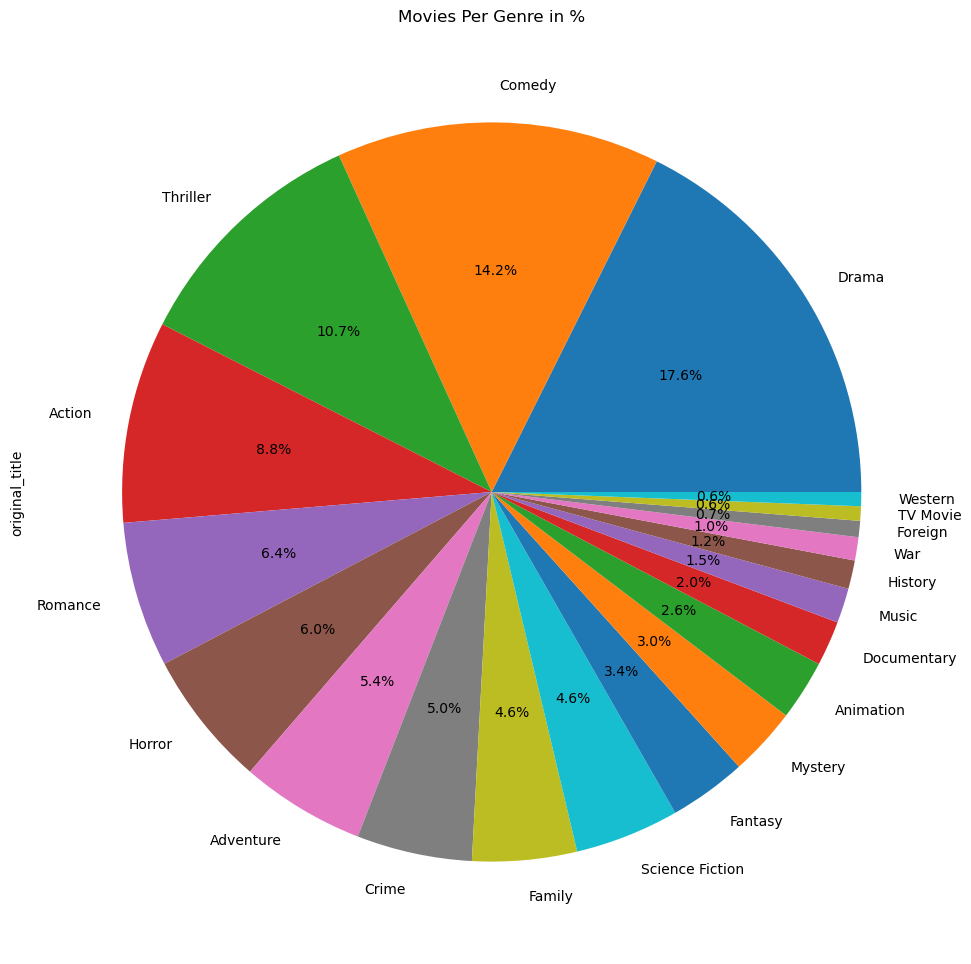

In [121]:
# Creating a pie chart to show the percentage distribution of movies across different genres
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (12,12))
plt.show()

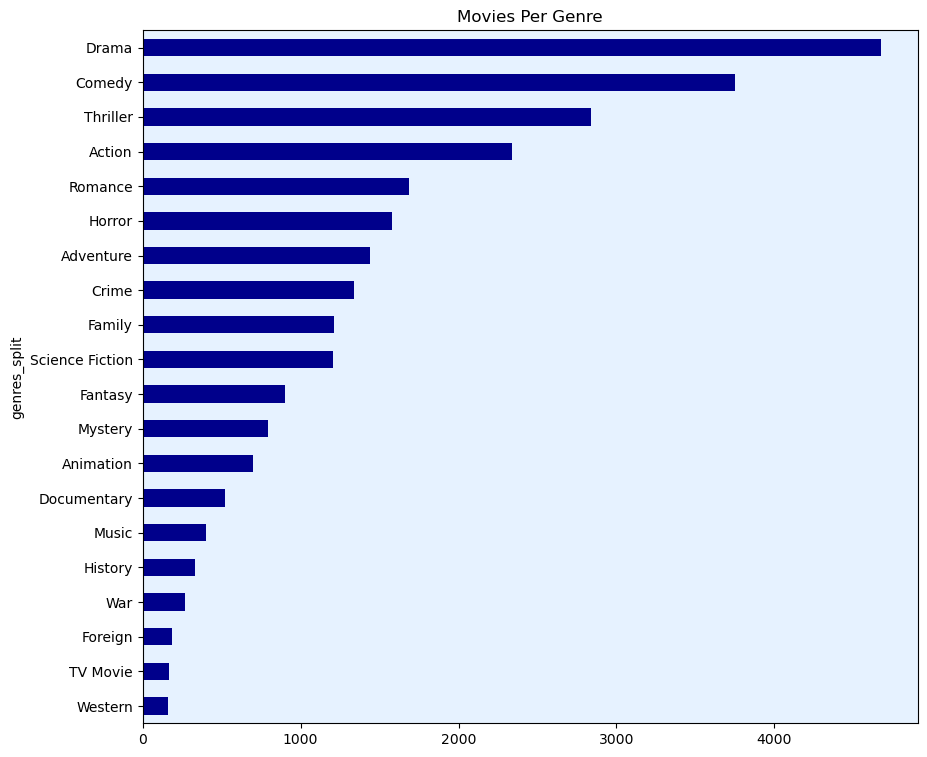

In [129]:
# Plotting the genre counts as a horizontal bar chart
# 'ax' refers to the chart (axes) object, which allows us to customize the plot area
ax = genres_count['original_title'].sort_values(ascending = True).plot.barh(title = 'Movies Per Genre', color = 'DarkBlue', figsize = (10, 9))
# Setting a light blue background for the chart area
ax.set_facecolor('#E6F2FF')
plt.show()

### Which genres have the highest budget and revenue!

In [134]:
# Calculating the average values of all numeric columns for each genre
genres_avg =  movies_genre.groupby('genres_split').mean(numeric_only = True)
# Setting the display format so that numeric values show in a cleaner, fixed decimal style
pd.options.display.float_format = '{:2f}'.format
genres_avg

popularity          budget          revenue    runtime  \
genres_split                                                              
Action             0.926274 27727820.331376  72794732.002517 104.917785   
Adventure          1.154259 37543694.530931 113137861.069341 106.173351   
Animation          0.852182 23159781.606581  75256062.223176  68.181688   
Comedy             0.592607 13297915.618244  37526242.072238  96.745057   
Crime              0.744930 17663801.124815  42368661.645495 106.917282   
Documentary        0.181432   577149.148077   2041106.994231 102.651923   
Drama              0.591495 11880717.773529  29232255.725840 110.478151   
Family             0.786668 23359337.420796  72433176.373680  89.603574   
Fantasy            0.992840 32612585.348253  96313657.081878 100.736900   
Foreign            0.191496  1451434.925532   1520459.835106 107.228723   
History            0.575936 18594919.302395  32011793.215569 136.206587   
Horror             0.465357  6226529.210751  16822808.624313  94.424557   
Music              0.487321  9438627.549020  28571768.691176 105.137255   
Mystery            0.690012 16119270.062963  40217566.661728 105.928395   
Romance            0.592082 12531271.847547  35691972.327103 106.891355   
Science Fiction    1.001548 24972680.524003  70140558.034174  99.419854   
TV Movie           0.270896   267664.670659    251497.005988  91.982036   
Thriller           0.741563 17207693.769178  41728417.543860 103.247678   
War                0.727683 20891886.103704  47605183.300000 127.625926   
Western            0.590615 18974107.975758  28568709.284848 117.575758   

                 vote_count  vote_average          profit  
genres_split                                               
Action           392.993708      5.787752 45066911.671141  
Adventure        513.125085      5.940585 75594166.538409  
Animation        303.000000      6.403147 52096280.616595  
Comedy           176.436330      5.905167 24228326.453994  
Crime            278.805022      6.124889 24704860.520679  
Documentary       35.105769      6.908462  1463957.846154  
Drama            182.544538      6.165546 17351537.952311  
Family           272.320877      5.997563 49073838.952884  
Fantasy          420.741266      5.863537 63701071.733624  
Foreign           16.627660      5.981383    69024.909574  
History          183.772455      6.410479 13416873.913174  
Horror           120.059866      5.337447 10596279.413561  
Music            124.340686      6.480392 19133141.142157  
Mystery          236.998765      5.946790 24098296.598765  
Romance          166.070678      6.042874 23160700.479556  
Science Fiction  437.096013      5.665582 45167877.510171  
TV Movie          34.365269      5.788024   -16167.664671  
Thriller         255.484348      5.750671 24520723.774682  
War              270.733333      6.297778 26713297.196296  
Western          205.739394      6.083030  9594601.309091

In [160]:
# Sort by budget (primary) and revenue (secondary), both ascending
genres_avg.sort_values(['budget', 'revenue'], ascending=[True, True], inplace=True)

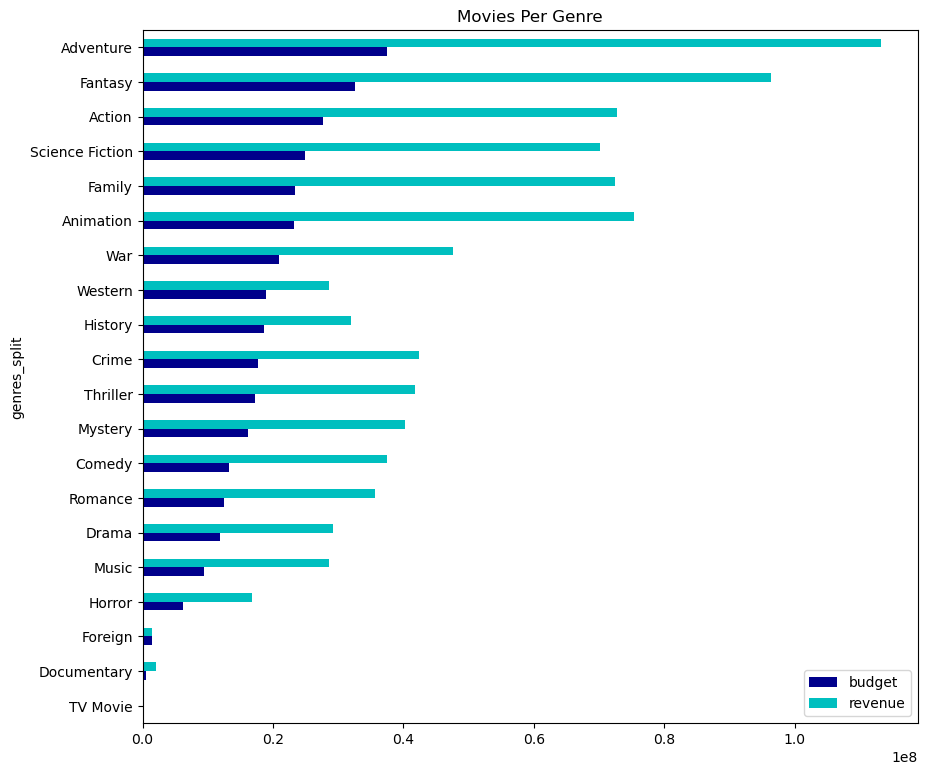

In [163]:
# Plotting a horizontal bar chart to compare the average budget and revenue for each genre,
# using different colors to distinguish between the two measures
genres_avg[['budget', 'revenue']].plot.barh(title = 'Movies Per Genre', color = ('DarkBlue', 'c'), figsize = (10, 9))
plt.show()

### Which genres have the highest average profit

In [169]:
# Sorting the genres in ascending order based on their average profit
genres_avg.sort_values('profit', ascending= True, inplace=True)

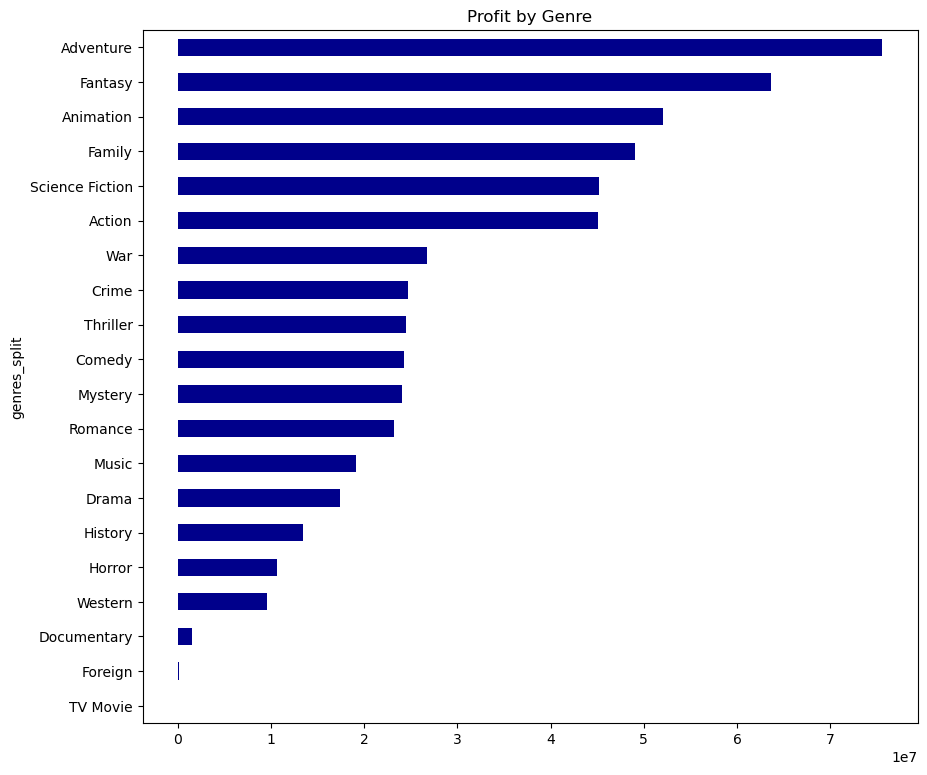

In [170]:
# Plotting a horizontal bar chart to show the average profit across genres
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = 'DarkBlue', figsize = (10, 9))
plt.show()

### Which genres have the highest avg popularity?

In [173]:
# Sorting the genres in ascending order based on their average popularity
genres_avg.sort_values('popularity', ascending= True, inplace=True)

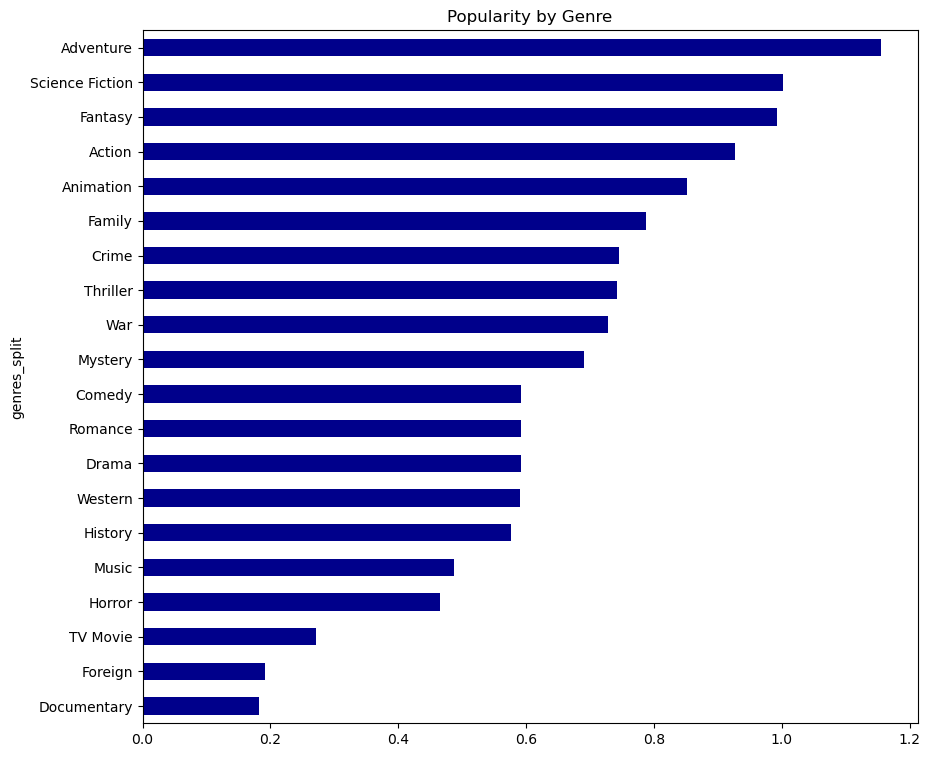

In [174]:
# Plotting a horizontal bar chart to show the average popularity across genres
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color = 'DarkBlue', figsize = (10, 9))
plt.show()

### Which genres have highest number of movies with a voting avg. >= 8

In [178]:
movies_genre.head()

popularity     budget     revenue      original_title  runtime  \
0   32.985763  150000000  1513528810      Jurassic World      124   
0   32.985763  150000000  1513528810      Jurassic World      124   
0   32.985763  150000000  1513528810      Jurassic World      124   
0   32.985763  150000000  1513528810      Jurassic World      124   
1   28.419936  150000000   378436354  Mad Max: Fury Road      120   

  release_date  vote_count  vote_average      profit     genres_split  
0       6/9/15        5562      6.500000  1363528810           Action  
0       6/9/15        5562      6.500000  1363528810        Adventure  
0       6/9/15        5562      6.500000  1363528810  Science Fiction  
0       6/9/15        5562      6.500000  1363528810         Thriller  
1      5/13/15        6185      7.100000   228436354           Action

In [193]:
# The code filters the movies_genre dataset to include only those movies that have received a minimum of 50 audience votes and have a vote_average of at least 8. 
#This ensures that only well-rated movies with a reliable number of votes are selected, reducing the effect of low-vote bias.
movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >=8)].head()

popularity     budget    revenue original_title  runtime release_date  \
9     6.326804  175000000  853708609     Inside Out       94       6/9/15   
9     6.326804  175000000  853708609     Inside Out       94       6/9/15   
9     6.326804  175000000  853708609     Inside Out       94       6/9/15   
35    3.557846    6000000   35401758           Room      117     10/16/15   
35    3.557846    6000000   35401758           Room      117     10/16/15   

    vote_count  vote_average     profit genres_split  
9         3935      8.000000  678708609       Comedy  
9         3935      8.000000  678708609    Animation  
9         3935      8.000000  678708609       Family  
35        1520      8.000000   29401758        Drama  
35        1520      8.000000   29401758     Thriller

In [231]:
#This line filters the dataframe movies_genre.
#It selects only those movies where:
#* vote_count is 50 or more → meaning the movie has received a good number of audience votes (not just a few opinions).
#* vote_average is 8 or higher → meaning the movie has high ratings.
#* The & means both conditions must be true.
#* The result is stored in a new dataframe called vote_fifty.
#* This is useful to find well-rated movies that also have enough votes to be considered reliable.

vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[(movies_genre['vote_average'] >= 8)]

In [228]:
#This counts the number of unique highly-rated movies per genre, converts it to a DataFrame, and sorts the genres from lowest to highest count.
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

In [229]:
genres_vote

vote_average
genres_split                 
Family                      1
Action                      2
Adventure                   2
Fantasy                     2
History                     2
Mystery                     2
War                         2
Horror                      3
Romance                     3
Science Fiction             3
Thriller                    4
Animation                   4
Crime                       4
Comedy                      5
Drama                       6
Music                       8
Documentary                 9

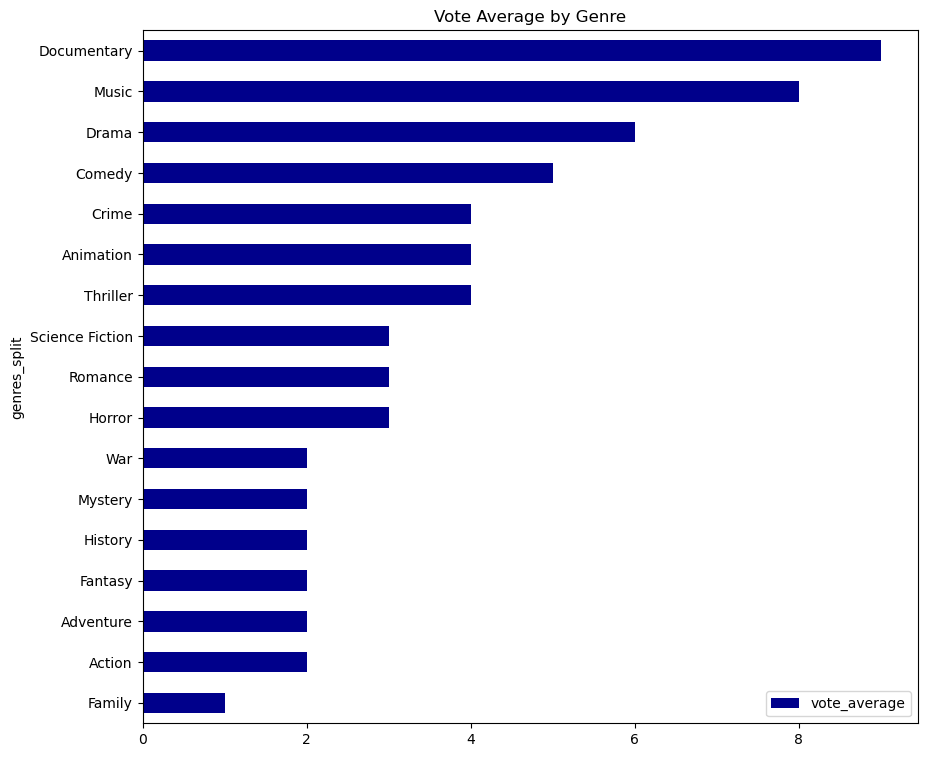

In [230]:
#This plots the average rating for each genre as a horizontal bar chart, making it easy to compare genre ratings visually.
genres_vote.plot.barh(title='Vote Average by Genre', color='DarkBlue', figsize=(10, 9))
plt.show()

### **Research Hypotheses(H):**


#### 1. The best movies according to vote avg. return high profit and revenue.


In [242]:
# Removes any duplicate movie entries from the dataset.
# *Keeps the data clean and accurate.
# *inplace=True means the change is made directly to the original dataframe.
movies.drop_duplicates(inplace = True)
# Creates a new column called profit.
# Profit is calculated as revenue earned minus the budget spent.
# Helps in analyzing which movies were financially successful.
movies['profit'] = movies['revenue'] - movies['budget']
# Selects only the important columns for analysis.
# Creates a new dataframe movies_genre with only relevant information.
# This makes the dataset simpler, cleaner, and easier to analyze and visualize.
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

In [244]:
# Filters the data to include only movies with at least 50 votes.
# *This ensures that ratings are reliable and not based on only a few people’s opinions.
# *Makes the analysis more trustworthy and meaningful.# 
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

# Calculates the correlation between the numeric columns in the filtered data.
# *numeric_only = True ensures that only number-based columns are used (text columns are ignored).
# *method = 'spearman' measures the strength of relationships between variables based on rank, which works well even if data is not normally distributed.
# *Helps identify which features move together, e.g., whether higher budget leads to higher revenue.

movies_counted.corr(numeric_only = True, method = 'spearman')

popularity    budget  revenue  runtime  vote_count  \
popularity      1.000000  0.484952 0.588594 0.230214    0.768888   
budget          0.484952  1.000000 0.714733 0.360001    0.554412   
revenue         0.588594  0.714733 1.000000 0.341469    0.682550   
runtime         0.230214  0.360001 0.341469 1.000000    0.263164   
vote_count      0.768888  0.554412 0.682550 0.263164    1.000000   
vote_average    0.189226 -0.044050 0.112201 0.286082    0.285084   
profit          0.498092  0.334345 0.842278 0.211947    0.583606   

              vote_average   profit  
popularity        0.189226 0.498092  
budget           -0.044050 0.334345  
revenue           0.112201 0.842278  
runtime           0.286082 0.211947  
vote_count        0.285084 0.583606  
vote_average      1.000000 0.198580  
profit            0.198580 1.000000

<Axes: xlabel='vote_average', ylabel='profit'>

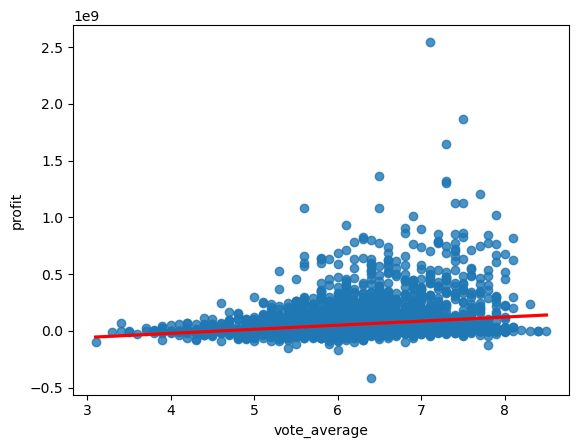

In [240]:
# Creates a scatter plot showing the relationship between movie ratings (vote_average) and profit.
# *Each point represents a single movie from the filtered dataset.
# *The red trendline is a regression line that shows the overall direction of the relationship.
# *If the line slopes upward: higher-rated movies tend to earn higher profit.
# *If the line slopes downward: higher ratings are associated with lower profit.
# *This visualization helps us quickly understand whether better-rated movies are generally more financially successful.


sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws = {'color': 'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

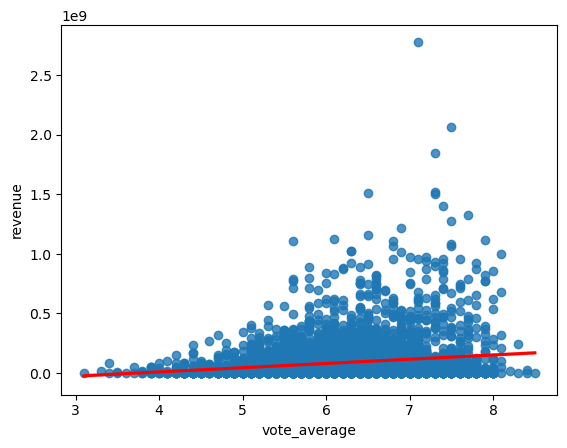

In [241]:
sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {'color': 'red'})

#### 2. The best movies according to popularity return high profit and revenue.

In [245]:
movies_counted.corr(numeric_only = True, method = 'spearman')

popularity    budget  revenue  runtime  vote_count  \
popularity      1.000000  0.484952 0.588594 0.230214    0.768888   
budget          0.484952  1.000000 0.714733 0.360001    0.554412   
revenue         0.588594  0.714733 1.000000 0.341469    0.682550   
runtime         0.230214  0.360001 0.341469 1.000000    0.263164   
vote_count      0.768888  0.554412 0.682550 0.263164    1.000000   
vote_average    0.189226 -0.044050 0.112201 0.286082    0.285084   
profit          0.498092  0.334345 0.842278 0.211947    0.583606   

              vote_average   profit  
popularity        0.189226 0.498092  
budget           -0.044050 0.334345  
revenue           0.112201 0.842278  
runtime           0.286082 0.211947  
vote_count        0.285084 0.583606  
vote_average      1.000000 0.198580  
profit            0.198580 1.000000

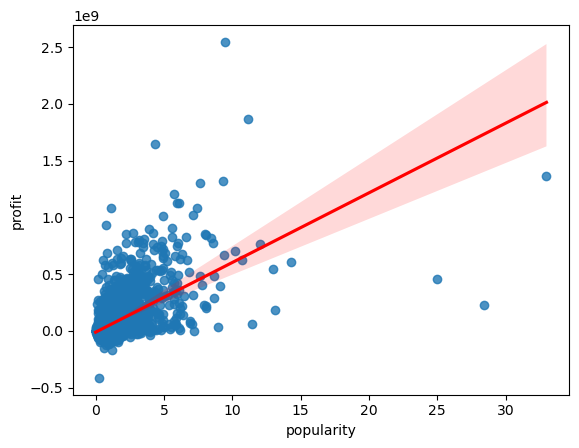

<Figure size 3000x500 with 0 Axes>

In [248]:
import matplotlib.pyplot as plt
sns.regplot(x = 'popularity', y = 'profit', data = movies_counted, line_kws = {'color': 'red'})
plt.figure(figsize = (30, 5))
plt.show()

#### 3. Highly budgeted movies return high profit


In [249]:
movies_counted.head()

popularity     budget     revenue                original_title  runtime  \
0   32.985763  150000000  1513528810                Jurassic World      124   
1   28.419936  150000000   378436354            Mad Max: Fury Road      120   
2   13.112507  110000000   295238201                     Insurgent      119   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens      136   
4    9.335014  190000000  1506249360                     Furious 7      137   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1  Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2         Adventure|Science Fiction|Thriller      3/18/15        2480   
3   Action|Adventure|Science Fiction|Fantasy     12/15/15        5292   
4                      Action|Crime|Thriller       4/1/15        2947   

   vote_average      profit  
0      6.500000  1363528810  
1      7.100000   228436354  
2      6.300000   185238201  
3      7.500000  1868178225  
4      7.300000  1316249360

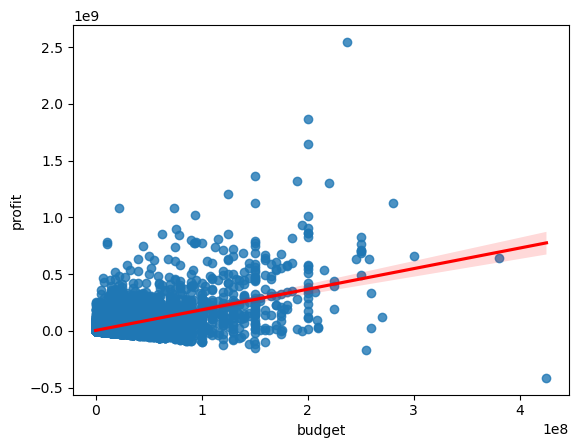

<Figure size 3000x500 with 0 Axes>

In [254]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {'color': 'red'})
plt.figure(figsize = (30, 5))
plt.show()

#### 4. Highly budgeted movies have a high popularity.

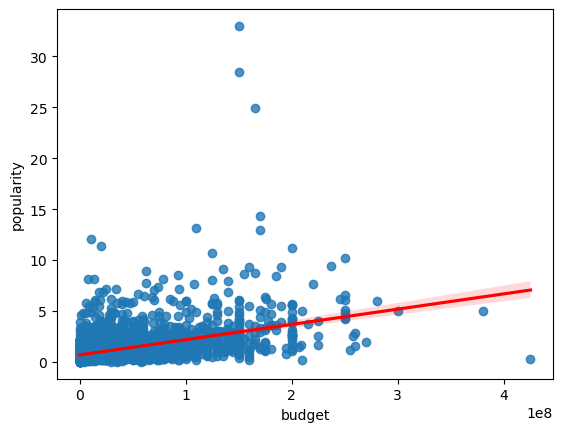

<Figure size 3000x500 with 0 Axes>

In [255]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {'color': 'red'})
plt.figure(figsize = (30, 5))
plt.show()

### Take a look at profit per genre per year

In [266]:
movies_genre.head()

popularity     budget     revenue      original_title  runtime  \
0   32.985763  150000000  1513528810      Jurassic World      124   
0   32.985763  150000000  1513528810      Jurassic World      124   
0   32.985763  150000000  1513528810      Jurassic World      124   
0   32.985763  150000000  1513528810      Jurassic World      124   
1   28.419936  150000000   378436354  Mad Max: Fury Road      120   

   release_year  vote_count  vote_average      profit     genres_split  
0          2015        5562      6.500000  1363528810           Action  
0          2015        5562      6.500000  1363528810        Adventure  
0          2015        5562      6.500000  1363528810  Science Fiction  
0          2015        5562      6.500000  1363528810         Thriller  
1          2015        6185      7.100000   228436354           Action

In [268]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())
time_genre

profit
release_year genres_split                    
1960         Action            6363125.000000
             Adventure          431000.000000
             Comedy            5258750.000000
             Crime                   0.000000
             Drama             8245619.384615
             Family            3333333.333333
             Fantasy           -375000.000000
             Foreign                 0.000000
             History           9600000.000000
             Horror            4389007.428571
             Music                   0.000000
             Romance           5225000.000000
             Science Fiction   -316666.666667
             Thriller          5028842.000000
             War                     0.000000
             Western            484166.666667
1961         Action            2457142.857143
             Adventure        39130002.333333
             Animation       211880014.000000
             Comedy           22198001.400000
             Crime            18828411.000000
             Drama             4912698.375000
             Family           42576002.800000
             Fantasy                 0.000000
             Foreign                 0.000000
             History           2333333.333333
             Horror             600000.000000
             Music            18828411.000000
             Mystery                 0.000000
             Romance            214285.714286
             Science Fiction         0.000000
             War              11450000.000000
             Western           -566666.666667
1962         Action           10437500.000000
             Adventure        21214285.714286
             Comedy            1599974.800000
             Crime             3709948.666667
             Drama             4373796.190476
             Family            4000000.000000
             Fantasy              -126.000000
             Foreign              -126.000000
             History          11250000.000000
             Horror             231600.000000
             Music             8000000.000000
             Mystery           -245000.000000
             Romance           -400025.200000
             Science Fiction    -31000.000000
             Thriller          7902857.142857
             War              15000000.000000
             Western          13266666.666667
1963         Action           14999691.250000
             Adventure         9428395.000000
             Animation               0.000000
             Comedy             765591.923077
             Crime              369526.750000
             Drama             1587307.692308
             Family            -333333.333333
             Fantasy           -500000.000000
             Foreign                 0.000000
             History           4908750.000000
             Horror             898558.777778
             Mystery           1568014.666667
             Romance           4388698.500000
             Science Fiction   -375000.000000
             Thriller          8612335.300000
             War               1000000.000000
             Western                 0.000000
1964         Action           24280000.000000
             Adventure        24123400.000000
             Animation               0.000000
             Comedy            7080111.375000
             Crime             1723307.300000
             Drama             3726105.550000
             Family           37818181.750000
             Fantasy          24068181.750000
             Foreign                 0.000000
             History                 0.000000
             Horror             -10833.333333
             Music            30354655.200000
             Mystery           1216209.750000
             Romance           6722222.222222
             Science Fiction   -300000.000000
             Thriller         14029426.555556
             War               2546757.333333
             Western                 0.000000
1965         Action           1610450

In [276]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

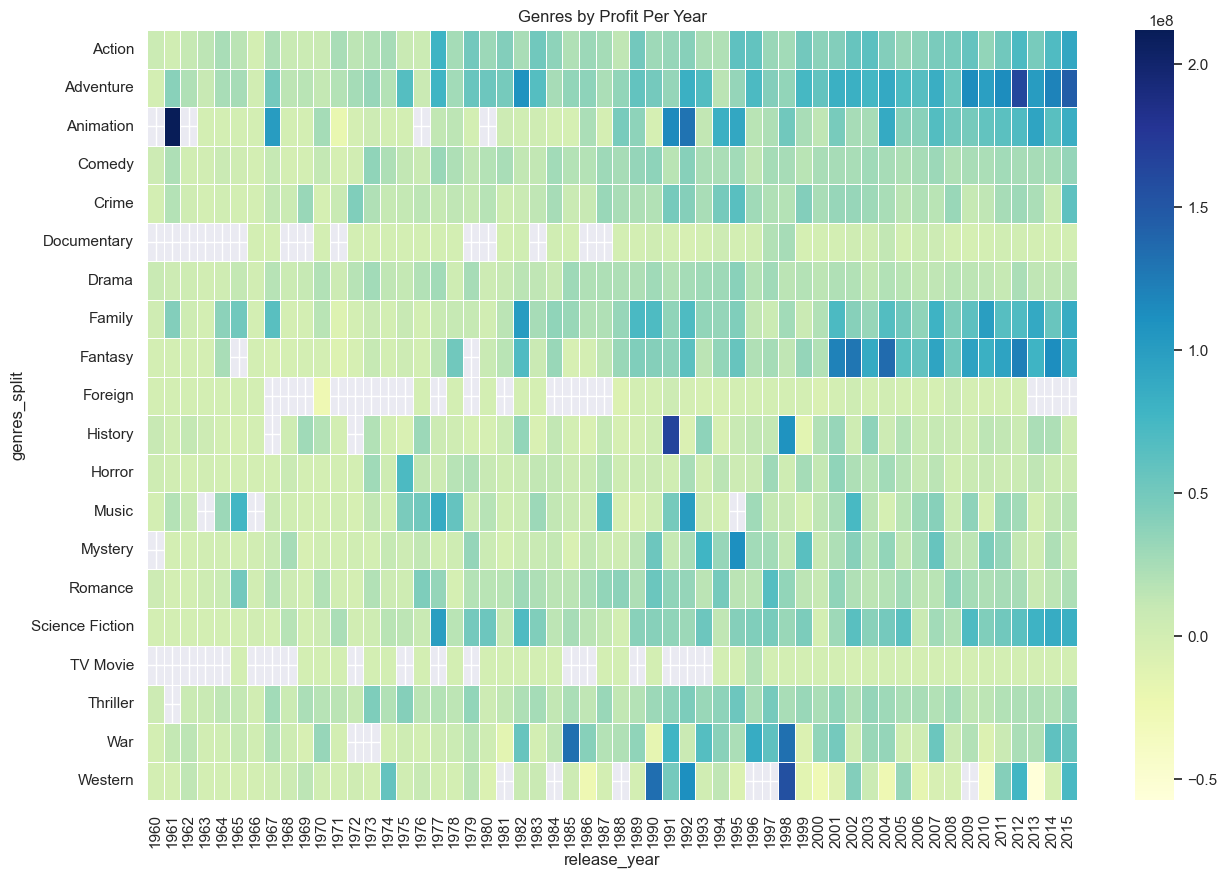

In [279]:
sns.set(rc = {'figure.figsize': (15, 10)})
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit Per Year')
plt.show()